In [103]:
from pathlib import Path

TEST_FOLDER = Path("tests")
SRC_FOLDER = Path("src")
BIN_FOLDER = Path("bin")
BIN_FILE = BIN_FOLDER / "TSP_ant.exe"
TIMES_FILE = Path("results.csv")
NO_POINTS = [10, 25, 50, 100, 200]
POINT_LIMIT = 500
print(TEST_FOLDER.absolute())

f:\Programowanie\Studia\OptymalizacjaKombinatoryczna\tests


In [104]:
import subprocess

def compile_src(filepath : Path, BIN_FOLDER : Path):
    cmd = ["g++", filepath, "-std=c++17","-o", f"{BIN_FOLDER / filepath.stem}.exe" ]
    p = subprocess.run(cmd, capture_output=True)
    print("Compiled: ", p.returncode, p.stdout.decode('utf-8'), p.stderr.decode('utf-8'))

for src_path in SRC_FOLDER.glob("TSP_ant.cpp"):
    compile_src(src_path, BIN_FOLDER)



Compiled:  0  


In [105]:
import random

def generate_test(test_folder:Path, number):

    points = []
    for _ in range(number):
        x = int(random.uniform(0, POINT_LIMIT))
        y = int(random.uniform(0, POINT_LIMIT))
        
        while (x,y) in points:
            x = int(random.uniform(0, POINT_LIMIT))
            y = int(random.uniform(0, POINT_LIMIT))
            
        points.append((x,y))

    with open(test_folder / f"test_{number}.txt", 'w') as f:
        f.write(f"{number}\n")
        for i, (x, y) in enumerate(points):
            f.write(f"{i} {x} {y}\n")


# ramdom_test_folder = TEST_FOLDER / "random"
# for test_file in ramdom_test_folder.glob("*.txt"):
#     test_file.unlink()

# for points in NO_POINTS: 
#     generate_test(ramdom_test_folder, points)



In [106]:
import csv

def run_test(test_path:Path):
    cmd = [str(BIN_FILE)]
    process = subprocess.run(cmd,capture_output=True, text=True, input=str(test_path.absolute()))
    return process.stdout.split()

with open(TIMES_FILE, 'w', newline='') as times_file:
    writer = csv.writer(times_file, delimiter=',')
    for test_file in TEST_FOLDER.rglob("*.txt"):
        output = run_test(test_file)
        print(f"{test_file.stem} {output[1]}ms {output[2]}m")
        writer.writerow([test_file.stem,*output])
        

berlin52 10146ms 8033.74m


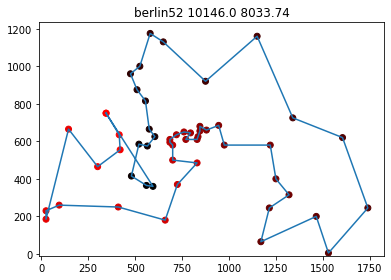

In [107]:
import matplotlib.pyplot as plt
import numpy as np

with open(TIMES_FILE, 'r') as csv_file:
    csv_data = list(csv.reader(csv_file, delimiter=','))


for test in csv_data:

    data = {}
    data["name"] = test[0]
    data["nodes"] = int(test[1])
    data["time"] = float(test[2])
    data["distance"] = float(test[3])
    data["traveled_nodes"] = []

    for row in test[4:]:
        x, y = row.split(';')
        data["traveled_nodes"].append((float(x), float(y)))

    nodes = data["nodes"]
    red = np.linspace(1, 0, nodes)

    red = np.append(red, [1,0,0])

    colors = list(zip(red, np.zeros(nodes+1), np.zeros(nodes+1)))
    #print(colors)

    x_cords, y_cords = zip(*data["traveled_nodes"])

    #print(x_cords)
    #print(y_cords)

    fig, ax = plt.subplots()
    ax.set(xlim=(-10, max(x_cords)*1.05), ylim=(-10, max(y_cords)*1.05))
    
    
    ax.scatter(x_cords, y_cords, c=colors)
    ax.plot(x_cords, y_cords)

    
    ax.set_aspect('equal', 'box')
    ax.set_title(f"{data['name']} {data['time']} {round(data['distance'],2)}")
    fig.tight_layout()


plt.show()